In [1]:
# Imports

import ipywidgets as widgets
import matplotlib.pyplot as plt
import math
import numpy as np
from numpy.fft import fft, ifft, fftshift, ifftshift
%matplotlib widget

In [2]:
def plot_TDF(s, fm, titulo):
    fft_s = fft(s)
    fig, axs = plt.subplots(2)
    axs[0].stem(t,s)
    axs[0].title.set_text(titulo)
    axs[0].set_xlabel('Tiempo (s)')
    axs[0].set_ylabel('Amplitud')

    f, fft_s = reordenar_TDF(fft_s, fm)
    axs[1].stem(f, abs(fft_s))
    axs[1].title.set_text('Espectro de Fourier')
    axs[1].set_xlabel('Frecuencia (Hz)')
    axs[1].set_ylabel('Amplitud de fft |X(f))|')
    plt.tight_layout()

def reordenar_TDF (TDF, fm):
    n = len(TDF)
    deltaf = fm/n
    # transformada entre -fm/2 y fm/2, teniendo en cuenta que cuando es número par,
    # la frecuencia sobrante de la división queda del lado de los positivos.
    if np.mod(n, 2) == 0:
        negativos = TDF[math.ceil(n/2)+1:len(TDF)]
        positivos = TDF[0:math.ceil(n/2)+1]
        f = np.arange(-fm/2+deltaf, fm/2+deltaf, deltaf)
        return f, np.concatenate([negativos, positivos])
    else:
        negativos = TDF[math.ceil(n/2):len(TDF)]
        positivos = TDF[0:math.ceil(n/2)]
        f = np.arange(-fm/2+deltaf/2, fm/2+deltaf/2, deltaf)
        return f, np.concatenate([negativos, positivos])

def reordenar_ITDF (TDF, fm):
    n = len(TDF)
    deltaf = fm/n
    # transformada entre -fm/2 y fm/2, teniendo en cuenta que cuando es número par,
    # la frecuencia sobrante de la división queda del lado de los positivos.
    if np.mod(n, 2) == 0:
        negativos = TDF[math.ceil(n/2):len(TDF)]
        positivos = TDF[0:math.ceil(n/2)]
        f = np.arange(-fm/2+deltaf/2, fm/2+deltaf/2, deltaf)
        return f, np.concatenate([negativos, positivos])
    else:
        negativos = TDF[math.floor(n/2):len(TDF)]
        positivos = TDF[0:math.floor(n/2)]
        f = np.arange(-fm/2+deltaf, fm/2+deltaf, deltaf)
        return f, np.concatenate([negativos, positivos])

def senoidal(A, fm, fs, phi, tini, tfin): 
    Tm = 1/fm
    t = np.arange(tini, tfin, Tm)
    x = A * np.sin(2*math.pi*fs*t + phi) 
    return t, x

def cuadrada(fm, fs, phi, tini, tfin):
  Tm = 1/fm
  t = np.arange(tini, tfin, Tm)  
  cond = np.mod(2*math.pi*fs*t+phi, 2*math.pi)
  idx_noceros = np.where(cond>= math.pi)
  y = np.ones(len(t))
  y[idx_noceros] = -1
  return t, y

# Práctica 4: Transformada discreta de Fourier

## Ejercicio 1
Ejercicio 1: Genere una señal $ s(t) = sin(2 \pi f_1 t)+4 sin(2\pi f_2 t) $ , con $ f1 = 10 Hz$ y $f2 = 20 Hz$ , y obtenga su versión discreta $ s[n]$  con periodo de muestreo $T = 0,001 s$ en el intervalo de tiempo $t = [0 . . . 1) s$ . A continuación:
1. Calcule la TDF $ S[k]$ de la señal $s[n]$ y grafique el espectro de magnitud de $S[k]$.


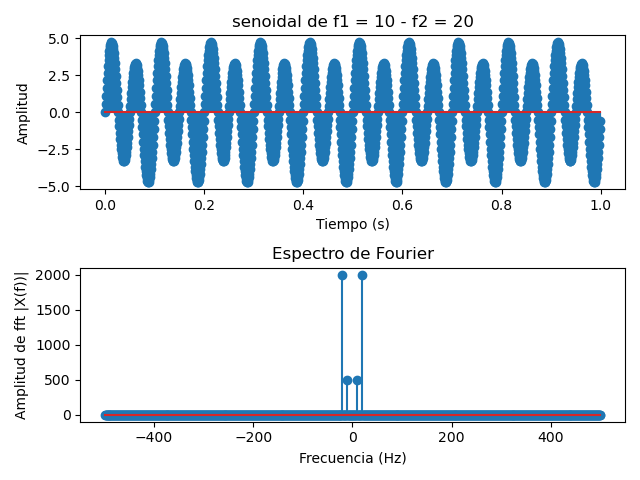

In [21]:
f1 = 10; f2 = 20; Tm = 0.001
t = np.arange(0, 1, Tm)
fm = 1/Tm
s = np.sin(2 * math.pi * f1 * t) + 4 * np.sin(2 * math.pi * f2 * t)

plot_TDF(s, fm, 'senoidal de f1 = %i' %f1 + ' - f2 = %i' %f2)

2. Verifique la relación de Parseval para la TDF:
$$ E_s = \sum_{n = 1}^{N} s[n]^2 = \sum_{n = 1}^{N} \frac{1}{N} |S[k]|^2 $$
donde N es la cantidad de muestras de s[n].


In [4]:
fft_s = fft(s)
print('Energia en el espacio temporal: ', np.power(np.linalg.norm(s,2),2))
print('Energia en el espacio frecuencial: ', np.sum(np.power(abs(fft_s),2))/len(fft_s))

Energia en el espacio temporal:  8500.0
Energia en el espacio frecuencial:  8500.0


Realice los siguientes cambios y analice los resultados obtenidos:
1. Modifique $s[n]$ de forma tal que:
$$ s[n] = sin(2 \pi f_1 t) + 4 sin(2 \pi f_2 t) + 4 $$
y analice los cambios en el espectro de magnitud de $S[k]$.

Al adicionar una constante, la cual tiene frecuencia 0, lo que se sucede es que se puede ver en el espectro frecuencial que se agrega una componente en el 0

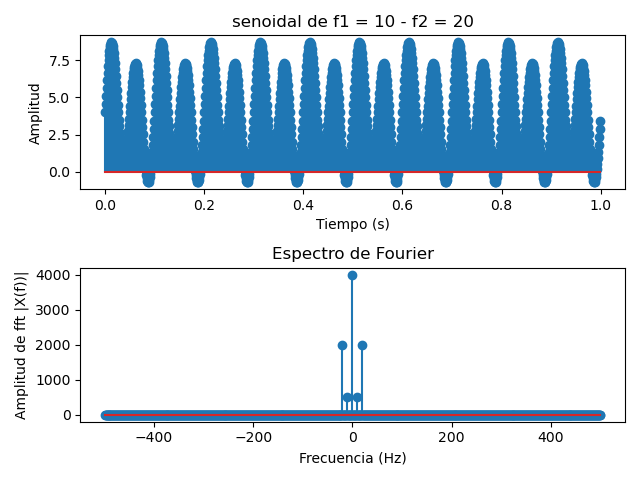

In [22]:
f1 = 10; f2 = 20; Tm = 0.001
t = np.arange(0, 1, Tm)
fm = 1/Tm
s = np.sin(2 * math.pi * f1 * t) + 4 * np.sin(2 * math.pi * f2 * t) + 4

plot_TDF(s, fm, 'senoidal de f1 = %i' %f1 + ' - f2 = %i' %f2)

2. Modifique las frecuencias de las señales seno de forma tal que $f1 = 10 Hz$ y $f2 = 11 Hz$ y analice los cambios en el espectro de magnitud de $S[k]$.

En este caso se ve una componente frecuencial en la frecuencia 10 y 11.

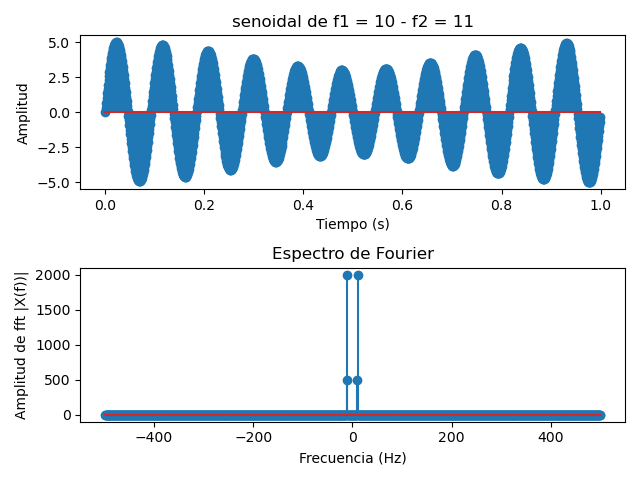

In [23]:
f1 = 10; f2 = 11; Tm = 0.001
t = np.arange(0, 1, Tm)
fm = 1/Tm
s = np.sin(2 * math.pi * f1 * t) + 4 * np.sin(2 * math.pi * f2 * t)

plot_TDF(s, fm, 'senoidal de f1 = %i' %f1 + ' - f2 = %i' %f2)

3. Modifique nuevamente las frecuencias de las señales seno de forma tal que $f1 = 10 Hz$ y $f2 = 10,5 Hz$. ¿Qué ocurre en el espectro de magnitud de $S[k]$?

En este caso pueden verse frecuencias aparentes que no estaban presentes en la señal original, ya que ambas frecuencias se encuentran muy cercanas entre sí con lo cual el aporte de cada una de ellas en el espectro se ve interferido uno con otro.

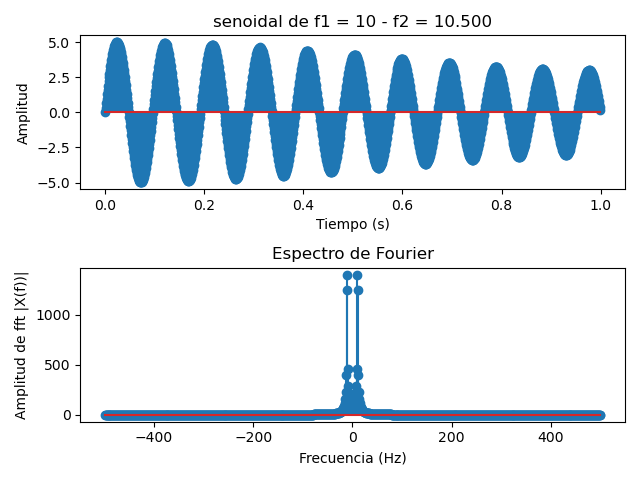

In [24]:
f1 = 10; f2 = 10.5; Tm = 0.001
t = np.arange(0, 1, Tm)
fm = 1/Tm
s = np.sin(2 * math.pi * f1 * t) + 4 * np.sin(2 * math.pi * f2 * t)

plot_TDF(s, fm, 'senoidal de f1 = %i' %f1 + ' - f2 = %.3f' %f2)

4. Modifique el intervalo de tiempo de análisis de la siguiente manera $t = [0 . . . 2) s$. y analice los cambios en la TDF

Al considerar un tiempo de análisis mayor el espacio entre frecuencias el df se vuelve lo suficientemente grande como para que no exista presencia de alias.

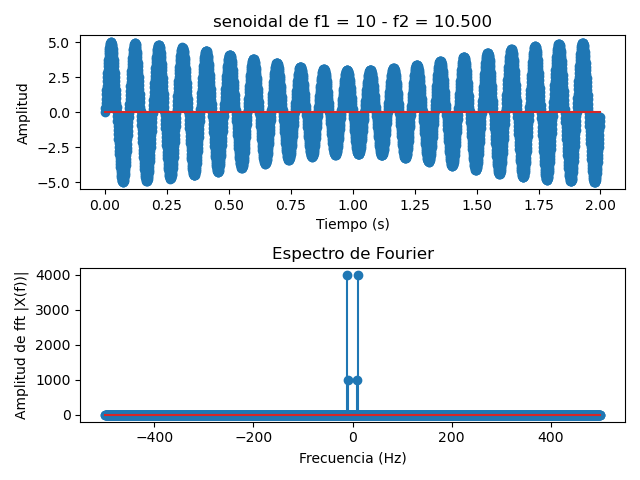

In [25]:
f1 = 10; f2 = 10.5; Tm = 0.001
t = np.arange(0, 2, Tm)
fm = 1/Tm
s = np.sin(2 * math.pi * f1 * t) + 4 * np.sin(2 * math.pi * f2 * t)
plot_TDF(s, fm, 'senoidal de f1 = %i' %f1 + ' - f2 = %.3f' %f2)

## Ejercicio 2
Genere:

a) una señal senoidal discreta de frecuencia 2 Hz, 

b) una señal cuadrada periódica de frecuencia 2 Hz, y
 
c) una señal senoidal de frecuencia 4 Hz.

Para todas ellas utilice fase cero, una frecuencia de muestreo de 100 Hz, y una duración total de 1 segundo. Con estas señales realice las siguientes operaciones:
1. Verifique si son ortogonales las señales a) y b), a) y c), b) y c).

In [9]:
# def senoidal(A, fm, fs, phi, tini, tfin):

t, sen_f2 = senoidal(1, 100, 2, 0, 0, 1)
t, cuad_f2 = cuadrada(100, 2, 0, 0, 1)
t, sen_f4 = senoidal(1, 100, 4, 0, 0, 1)

print('ortogonalidad a) y b) - prod punto', np.dot(sen_f2, cuad_f2))
print('ortogonalidad a) y c) - prod punto', np.dot(sen_f2, sen_f4))
print('ortogonalidad b) y c) - prod punto', np.dot(cuad_f2, sen_f4))

ortogonalidad a) y b) - prod punto 63.57817937546122
ortogonalidad a) y c) - prod punto -1.1379786002407855e-15
ortogonalidad b) y c) - prod punto 5.551115123125783e-17


a) y b) no son ortogonales,
c) y b) son ortogonales,
b) y c) son ortogonales,

2. Calcule la TDF de las tres señales, y verifique la ortogonalidad de los pares como en el ejercicio anterior, en este dominio transformado.

In [10]:
fft_sen_f2 = np.abs(fft(sen_f2))
fft_cuad_f2 = np.abs(fft(cuad_f2))
fft_sen_f4 = np.abs(fft(sen_f4))

print('DOMINIO DE FRECUENCIAS')
print('ortogonalidad a) y b) - prod punto', np.dot(fft_sen_f2, fft_cuad_f2))
print('ortogonalidad a) y c) - prod punto', np.dot(fft_sen_f2, fft_sen_f4))
print('ortogonalidad b) y c) - prod punto', np.dot(fft_cuad_f2, fft_sen_f4))

DOMINIO DE FRECUENCIAS
ortogonalidad a) y b) - prod punto 6370.388443963464
ortogonalidad a) y c) - prod punto 7.685270980699962e-13
ortogonalidad b) y c) - prod punto 1.3682465632984454e-12


Al realizar el producto punto en el espacio frecuencial se puede verificar la propiedad de que se mantienen las ortogonalidades al cambiar el espacio, dado que se trata de una rotación de las bases que no afecta a la ortogonalidad de las mismas. Del mismo modo, los vectores que no eran ortogonales siguen sin serlo.

3. Redefina la señal c), como una senoidal pero de frecuencia 3.5 Hz. Verifique si es ortogonal respecto a la señal a), en ambos dominios.

En este caso a aparecer frecuencias aparentes en el espectro de la señal de 3.5 Hz de frecuencia, la ortogonalidad en el dominio frecuencial no se mantiene, porque el espectro de la segunda señal contiene alias.

DOMINIO TEMPORAL
ortogonalidad a) y c) - prod punto -5.5441762292218755e-15
DOMINIO FRECUENCIAL
ortogonalidad a) y c) - prod punto 1346.7345218206553


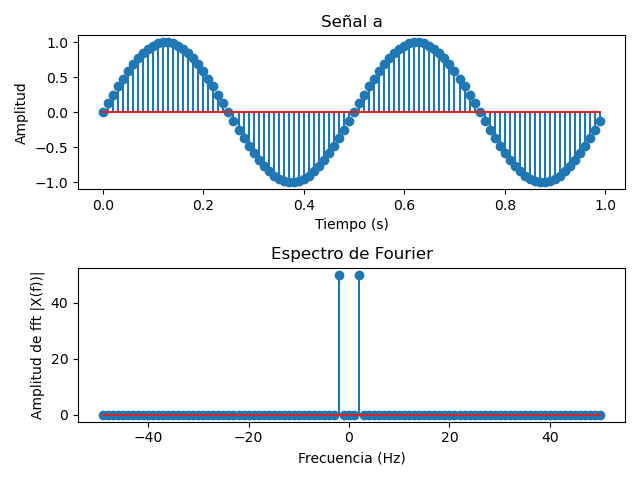

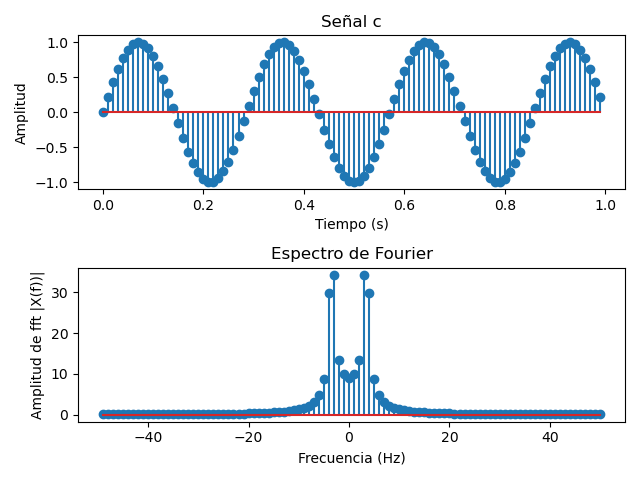

In [26]:

t, s_a = senoidal(1, 100, 2, 0, 0, 1)
t, s_b = senoidal(1, 100, 3.5, 0, 0, 1)

plot_TDF(s_a, 100, 'Señal a')
plot_TDF(s_b, 100, 'Señal c')

fft_a = np.abs(fft(s_a))
fft_b = np.abs(fft(s_b))

print('DOMINIO TEMPORAL')
print('ortogonalidad a) y c) - prod punto', np.dot(s_a, s_b))
print('DOMINIO FRECUENCIAL')
print('ortogonalidad a) y c) - prod punto', np.dot(fft_a, fft_b))



## Ejercicio 3
Verifique la propiedad de retardo temporal de la transformada discreta de Fourier. Para ello, genere una señal senoidal de 10 Hz, muestreada a 100 Hz durante un segundo. Calcule su transformada de Fourier. Modifique esta última de acuerdo a la ecuación de la propiedad, para generar un retardo de 10 muestras.
Antitransforme y verifique el cumplimiento de la propiedad.

Propiedad de desplazamiento temporal (retardo):

![a](img/propiedad_retardo_fourier.png)

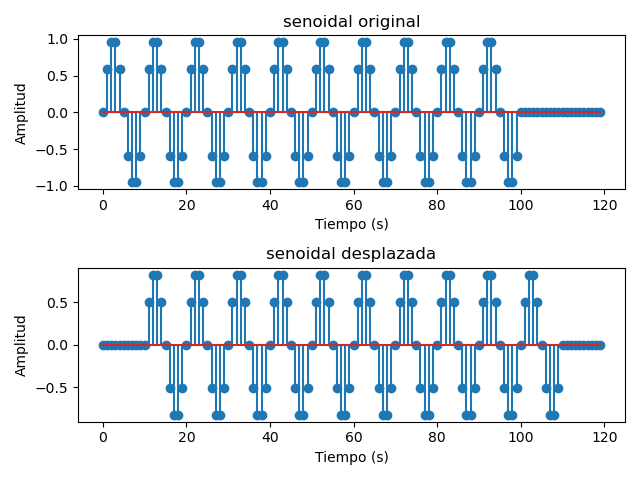

In [27]:
t, s_a = senoidal(1, 100, 10, 0, 0, 1)
s_a = np.concatenate([s_a, np.zeros(20)])

fft_despl = fft(s_a) * np.exp((-1j * 2 * math.pi * np.arange(1,len(s_a)+1,1) * 10)/len(s_a))

ifft_despl = ifft(fft_despl)

fig, axs = plt.subplots(2)
axs[0].stem(s_a)
axs[0].title.set_text('senoidal original')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')

axs[1].stem(np.real(ifft_despl))
axs[1].title.set_text('senoidal desplazada')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')

plt.tight_layout()

## Ejercicio 4
Las señales verifican que cuanto más concentrada está su energía en cierta región del dominio temporal, más dispersa estará en el dominio frecuencial, y viceversa. Ejemplos extremos de esto son:

1. Una señal senoidal, que tiene su energía distribuida a lo largo de toda la señal, pero en dominio frecuencial ésta se concentra en la frecuencia de la misma, y
2. Un delta de Dirac, que en dominio temporal tiene toda su energía concentrada en un instante, pero en dominio frecuencial contiene todas las frecuencias.

Explore esta propiedad utilizando ventanas temporales, más o menos concentradas alrededor de cierto tiempo, y calculando sus
respectivas transformadas de Fourier

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Amplitud [dB]')

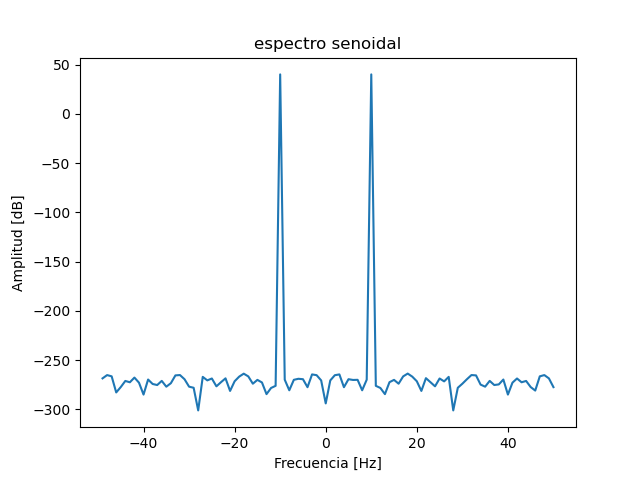

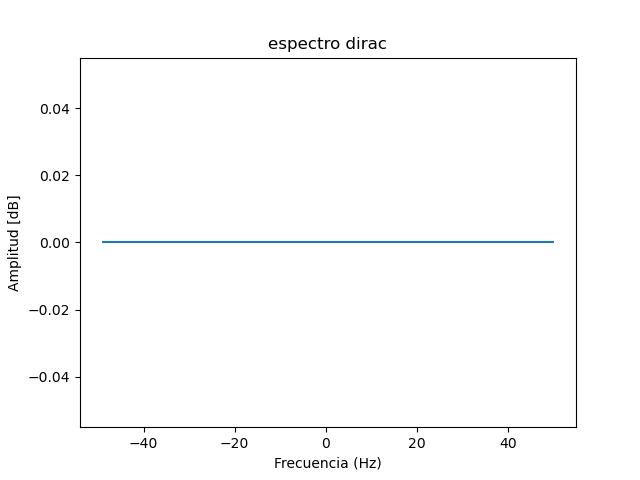

In [28]:
t, sen = senoidal(2, 100, 10, 0, 0, 1)
dirac = np.zeros(len(sen)); dirac[0] = 1

f_sen, fft_sen = reordenar_TDF(fft(sen), 100)
f_dir, fft_dir = reordenar_TDF(fft(dirac), 100)

plt.close('all')
plt.plot(f_sen,20*np.log10(fft_sen)); plt.title('espectro senoidal'); plt.xlabel('Frecuencia [Hz]'); plt.ylabel('Amplitud [dB]')
plt.figure()
plt.plot(f_dir,20*np.log10(fft_dir)); plt.title('espectro dirac'); plt.xlabel('Frecuencia (Hz)'); plt.ylabel('Amplitud [dB]')

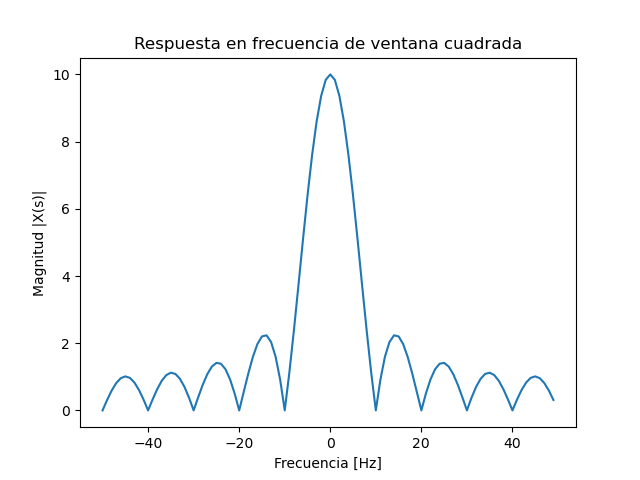

In [29]:
v_cuad = np.zeros(100); v_cuad[45:55] = 1
  
plt.close('all')
  
A = fft(v_cuad)
mag = np.abs(fftshift(A))
fm = 100
f = np.arange(-fm//2, fm//2, fm/len(A))

  
plt.plot(f,mag)
plt.title("Respuesta en frecuencia de ventana cuadrada")
plt.ylabel("Magnitud |X(s)|")
plt.xlabel("Frecuencia [Hz]")
plt.axis('tight')
plt.show()

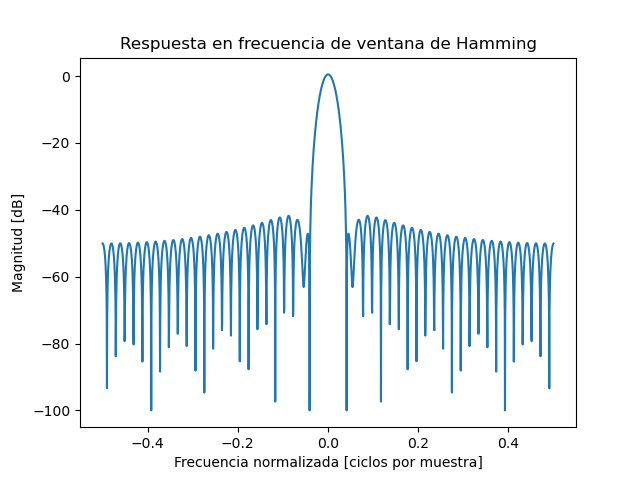

In [30]:
window = np.hamming(51)
  
plt.close('all')
  
A = fft(window, 2048) / 25.5
mag = np.abs(fftshift(A))
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)
  
plt.plot(freq, response)
plt.title("Respuesta en frecuencia de ventana de Hamming")
plt.ylabel("Magnitud [dB]")
plt.xlabel("Frecuencia normalizada [ciclos por muestra]")
plt.axis('tight')
plt.show()

<ipython-input-31-3d6e82ffe5a2>:8: RuntimeWarning: divide by zero encountered in log10
  response = 20 * np.log10(mag)


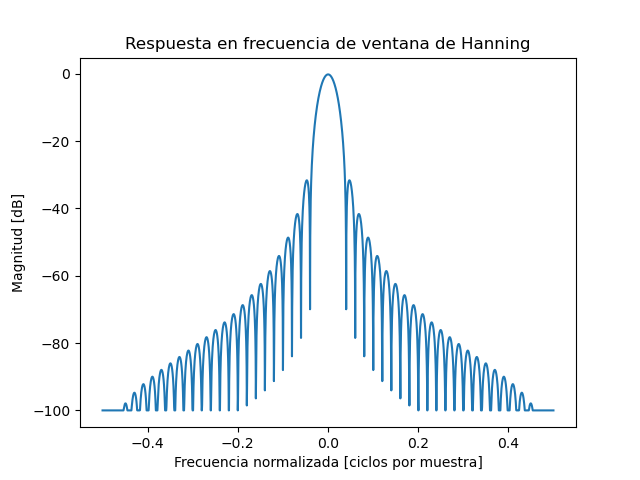

In [31]:
window = np.hanning(51)
  
plt.close('all')
  
A = fft(window, 2048) / 25.5
mag = np.abs(fftshift(A))
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)
  
plt.plot(freq, response)
plt.title("Respuesta en frecuencia de ventana de Hanning")
plt.ylabel("Magnitud [dB]")
plt.xlabel("Frecuencia normalizada [ciclos por muestra]")
plt.axis('tight')
plt.show()

<ipython-input-32-e5f89d180ba1>:8: RuntimeWarning: divide by zero encountered in log10
  response = 20 * np.log10(mag)


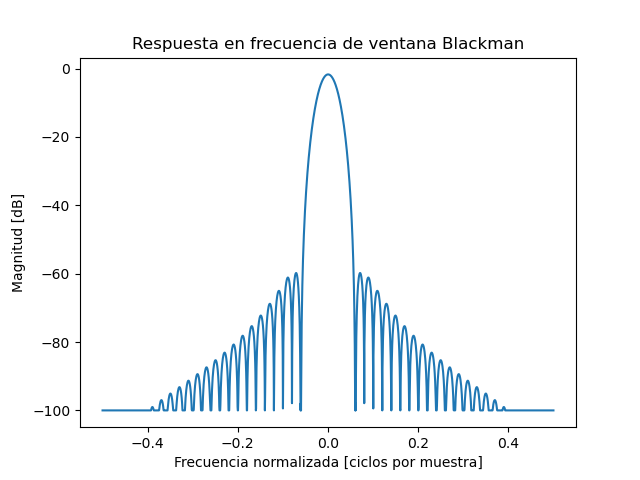

In [32]:
window = np.blackman(51)
  
plt.close('all')
  
A = fft(window, 2048) / 25.5
mag = np.abs(fftshift(A))
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)
  
plt.plot(freq, response)
plt.title("Respuesta en frecuencia de ventana Blackman")
plt.ylabel("Magnitud [dB]")
plt.xlabel("Frecuencia normalizada [ciclos por muestra]")
plt.axis('tight')
plt.show()

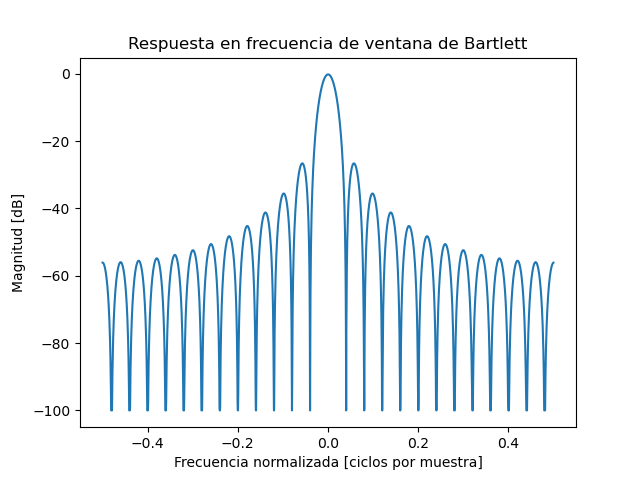

In [33]:
window = np.bartlett(51)
  
plt.close('all')
  
A = fft(window, 2048) / 25.5
mag = np.abs(fftshift(A))
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)
  
plt.plot(freq, response)
plt.title("Respuesta en frecuencia de ventana de Bartlett")
plt.ylabel("Magnitud [dB]")
plt.xlabel("Frecuencia normalizada [ciclos por muestra]")
plt.axis('tight')
plt.show()

## Ejercicio 5
La Figura 1 representa la magnitud de la FFT de una señal senoidal de 27 Hz, muestreada durante 1 s y a una frecuencia de muestreo de 50 Hz. La señal muestreada responde a la ecuación $$ x(t) = 2 sin(2 \pi 27t) $$
![a](img/ej5_guia4.png)

1. Determine la frecuencia de la señal que observa. Explique la discrepancia con frecuencia de la señal original.

la frecuencia de la señal que se observa, es de 23 Hz. Esto sucede porque no se cumple el teorema del muestreo, y por ello se genera una frecuencia aparente.

frecuencia en el espectro: 23.0


Text(0, 0.5, 'Amplitud |X[k]|')

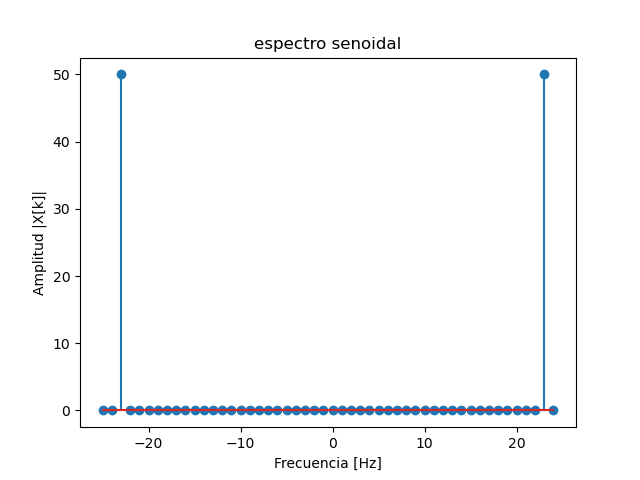

In [36]:
fm = 50; fs = 23
t, sen = senoidal(2, fm, fs, 0, 0, 1)
A = fft(sen)
mag = np.abs(fftshift(A))
f = np.arange(-fm//2, fm//2, fm/len(A))

f_o = np.abs(fs - fm * np.round(fs/fm))
print('frecuencia en el espectro:', f_o)

plt.close('all')
plt.stem(f,mag); plt.title('espectro senoidal'); plt.xlabel('Frecuencia [Hz]'); plt.ylabel('Amplitud |X[k]|')

2. Deduzca una ecuación para determinar cómo se genera la señal de la frecuencia observada, a partir de la frecuencia original y los parámetros del muestreo. Verifique la validez de su ecuación para otras señales, por ejemplo una de 105 Hz.

$$ f_o = |f_s - f_m * round(\frac{f_s}{f_m})| $$
$$ f_o = |105 - 50 * round(\frac{105}{50})| $$



frecuencia en el espectro: 5.0


Text(0, 0.5, 'Amplitud |X[k]|')

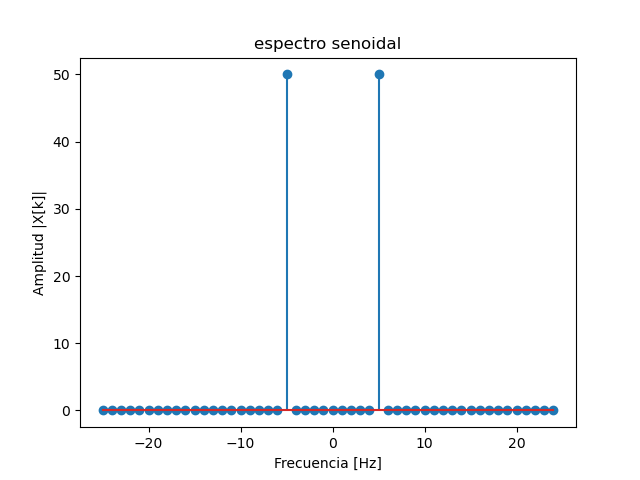

In [35]:
fm = 50; fs = 105
t, sen = senoidal(2, fm, fs, 0, 0, 1)
A = fft(sen)
mag = np.abs(fftshift(A))
f = np.arange(-fm//2, fm//2, fm/len(A))

f_o = np.abs(fs - fm * np.round(fs/fm))
print('frecuencia en el espectro:', f_o)

plt.close('all')
plt.stem(f,mag); plt.title('espectro senoidal'); plt.xlabel('Frecuencia [Hz]'); plt.ylabel('Amplitud |X[k]|')


3. Determine la relación entre la magnitud observada de la transformada y la amplitud de la señal original.

$$A_e = \frac{A * N}{2}$$

## Ejercicio 6
La señal que se encuentra en el archivo necg.txt corresponde al registro de la actividad eléctrica del corazón de un paciente. Esta señal se ha digitalizado a razón de 360 muestras por segundo. Se sabe que el registro ha sido contaminado con un ruido en la banda de 40 a 180 Hz y se necesita eliminarlo
para poder realizar un diagnóstico adecuado. Utilice la TDF para filtrar la señal.

Text(0, 0.5, 'Amplitud')

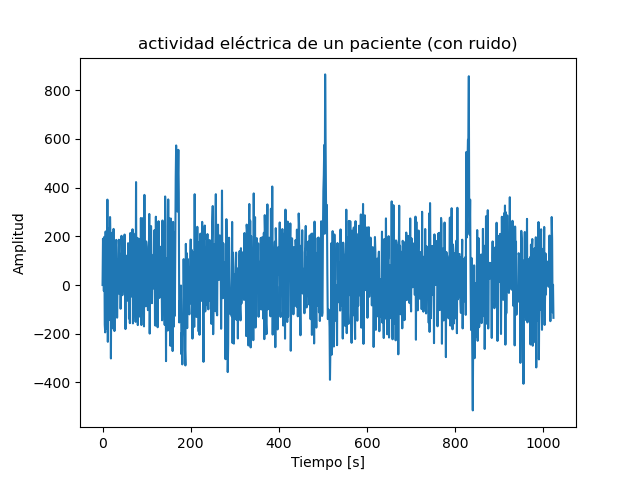

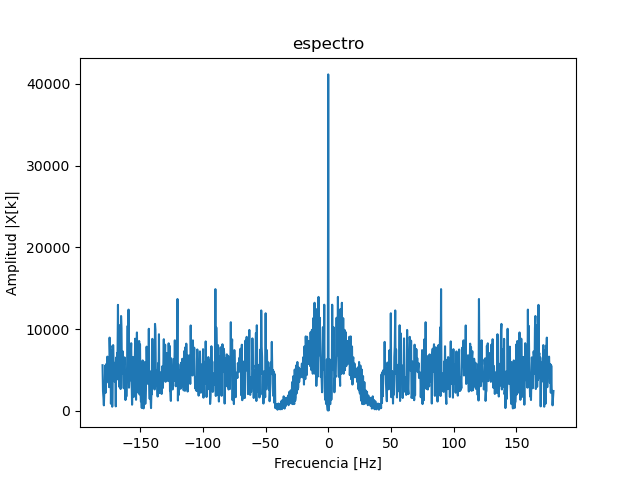

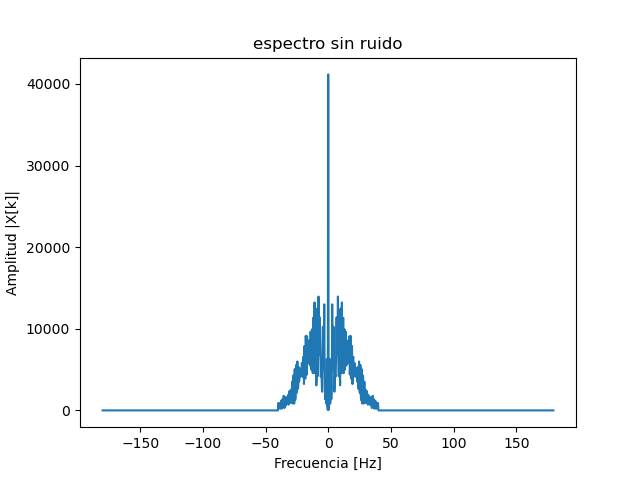

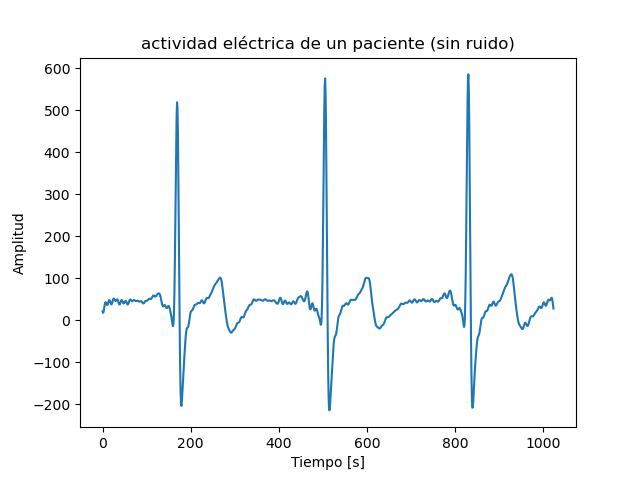

In [38]:
data = np.loadtxt('datasets/necg.txt')
plt.close('all')
plt.figure()
plt.plot(data); plt.title('actividad eléctrica de un paciente (con ruido)'); plt.xlabel('Tiempo [s]'); plt.ylabel('Amplitud')
fm = 360

A = fft(data)
mag = fftshift(A)
f = np.arange(-fm//2, fm//2, fm/len(A))
rango = np.where(np.abs(f) > 39.99)

plt.figure()
plt.plot(f,np.abs(mag)); plt.title('espectro'); plt.xlabel('Frecuencia [Hz]'); plt.ylabel('Amplitud |X[k]|')

mag[rango] = 0
plt.figure()
plt.plot(f,np.abs(mag)); plt.title('espectro sin ruido'); plt.xlabel('Frecuencia [Hz]'); plt.ylabel('Amplitud |X[k]|')

A = ifft(ifftshift(mag))
plt.figure()
plt.plot(np.real(A)); plt.title('actividad eléctrica de un paciente (sin ruido)'); plt.xlabel('Tiempo [s]'); plt.ylabel('Amplitud')

